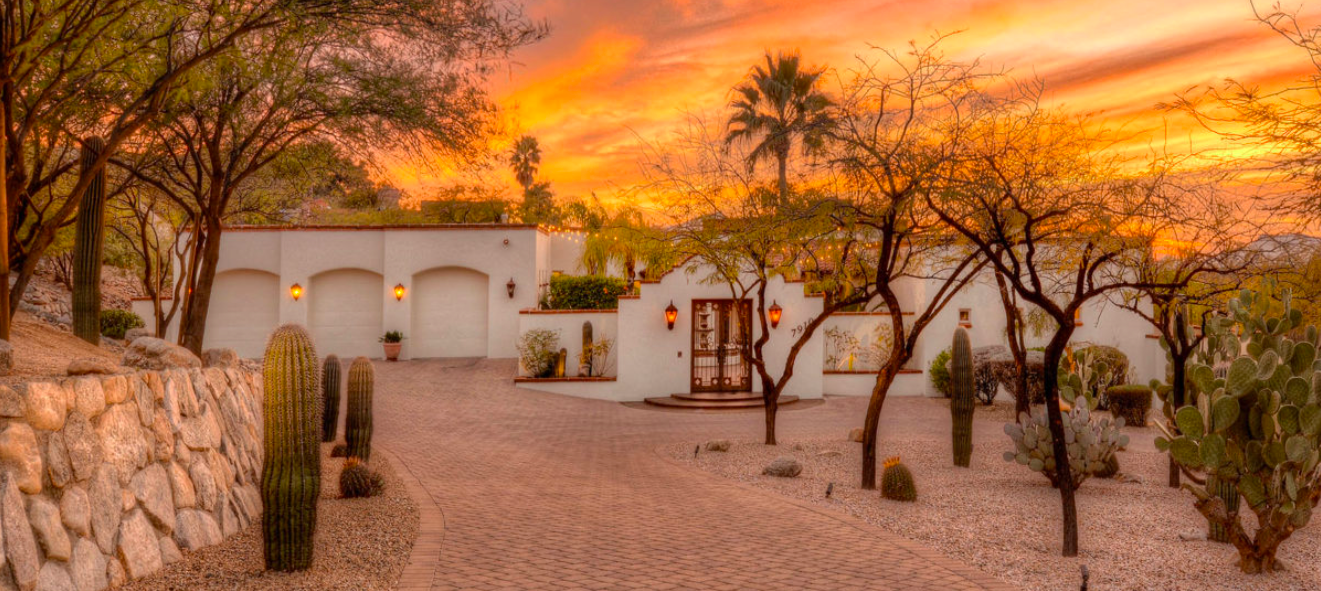

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
import scipy.stats
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import visuals
import pandas as pd
import wrangle
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(123)

Acquiring data from SQL database


# Zillow 2017 Report: Estimating Home Value

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Overview

The purpose of this project is to create a model (or multiple models) that outperforms the baseline model for predicting home values. At the end of this process, I discover one new insight into how a feature affects model performance. I hope my final recommendation is valuable in helping our data science team develop a very accurate model by end of quarter. My report includes all steps of the data science pipeline. 

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Business Goals

- Construct an ML Regression model that predicts propery tax assessed values of Single Family Properties using attributes of the properties.
- Find the key drivers of property value for single family properties.
- Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.
- Make recommendations on what works or doesn't work in predicting home values.
- Provide information about what state and county the data has been pulled from

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Deliverables
- Github repo with a complete readme.md
- Final Report 
- Acquire and Prepare Modules 
- Supplementary Exploration Notebooks
- Live 5 minute presentation

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Acquisition 

- Data was acquired from zillow table from Codeup SQL Database 

### Data Preparation 
- Sorted Values in Descending order and dropped (first) row with 2018 transaction 
- Dropped columns propertylandusedesc, transactiondate (only joined into original data to filter by 'single family homes', and 'transaction date 2017 homes')
- Dropped all null values by row
- Dropped outliers using Q1/Q3 plus/minus (1.5 * IQR) for bedroom count, bathroom count, square feet, and tax value dollar count 
- Converted fips, yearbuilt, taxvaluedollarcnt, calculatedfinishedsquarefeet, and bedroomcnt to datatype integer 

### Note about Data Preparation: 
- Because my goal was less about creating a model that would work for a wide variety of homes, and more about examining how the individual features affect home value, I chose to drop all null values and remove outliers. Using the interquartile rule to remove outliers, I dropped outliers from bedroom count, bathroom count, square feet, and property tax value. I retained 74% of my original data. 

In [2]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


Split Data: train, validate, test

In [3]:
train, validate, test = wrangle.split_zillow_data(df)

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Exploratory Data Analysis

### Goal
- Find the key drivers of property value for single family properties so that we can improve the model that predicts home values 

### Exploratory Questions: 
- Why do some properties have a much higher value than others when they are located so close to each other? 
- Which has a greater influence on home value: number of bathrooms or number of bedrooms?
- Do more bathrooms equate to a higher property value?
- Do more bedrooms equate to a higher property value? 

### Note about Exploratory Analysis: 
- In order to see how features interact with the target variable I broke down my exploratory data analysis into three subsets: Ventura County, Orange County, and LA county. Inside each county subsection, I provide five visuals. The first two visuals are pie charts. The first pie chart depicts the percent by number of bathrooms sold(ie in Ventura 50% of homes sold had 2 bathrooms); the second is percent by number of bedrooms(ie in Ventura 45% of homes sold had 3 bedrooms). The reason this is important is because the following two visuals show the increase in property tax value with respect to the year built (divided by bedrooms or bathrooms (visual under bedrooms)). , the reader could deduce that, for Ventura county, the year a property is built affects property value strongly for 3, 4, and 5 bedroom homes; your next question might be, well, what percentage of homes have less than 3 bedrooms? Referring to the pie chart, we would know that only 9% of homes had 2 bedrooms. We can be farely confident, that newer

In [4]:
#subset data by location
train_Ventura = train[train.location == 'Ventura']
train_LA = train[train.location == 'LA']
train_Orange = train[train.location == 'Orange']

In [5]:
validate_Ventura = validate[validate.location == 'Ventura']
validate_LA = validate[validate.location == 'LA']
validate_Orange = validate[validate.location == 'Orange']

In [6]:
test_Ventura = test[test.location == 'Ventura']
test_LA = test[test.location == 'LA']
test_Orange = test[test.location == 'Orange']

### Ventura County

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

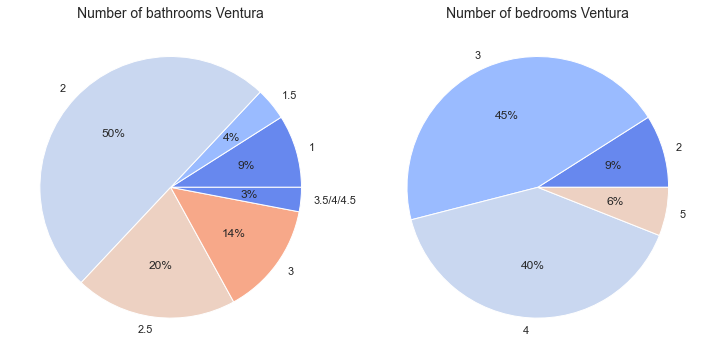

In [119]:
visuals.Ventura_Pie()

Key Takeaways (The Big Picture): 
- Homes sold in Ventura in 2017: 50% had 2 bathrooms, 20% had 2.5 bathrooms, 14% had 3 bathrooms. 
- Homes sold in Ventura in 2017: 45% had 3 bedrooms, 40% had 4 bedrooms, 9% had 2 bedrooms.

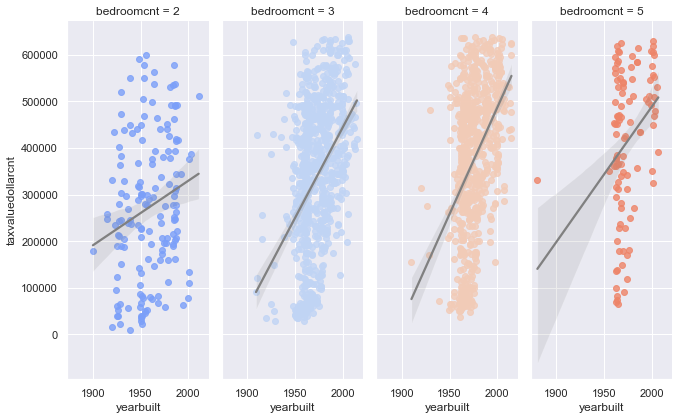

In [8]:
visuals.Ventura_bedroom()

Key takeaways: 
- Because 85% of the homes sold in Ventura had 3 or 4 bedrooms, we can assume a strong positive linear relationship between year built and home tax value.
- While still having a slight positive linear relationship, the build year has less influence on 2 bedroom home values

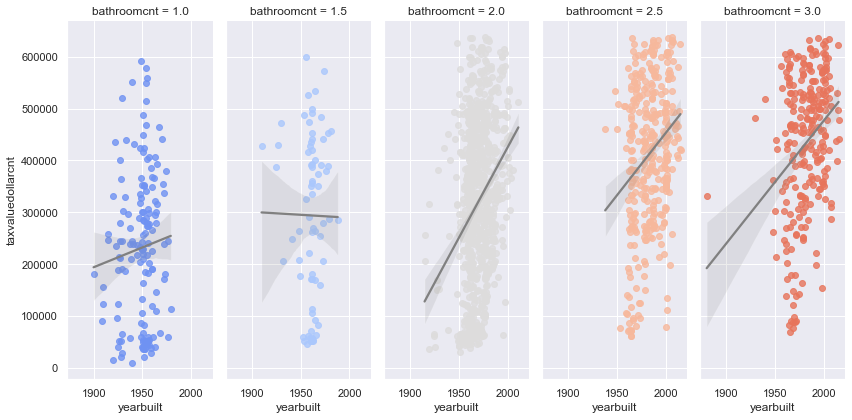

In [9]:
visuals.Ventura_bathroom()

Key takeaways: 
- Because 84% of the homes sold in Ventura had 2, 2.5, or 3 bathrooms, we can assume a strong positive linear relationship between year built and home tax value.
- 9% of homes had one bathroom: homes in this subset show a slight positive linear relationship
- 4% of homes had 1.5 bathrooms: homes in this subset show a slight negative linear relationship

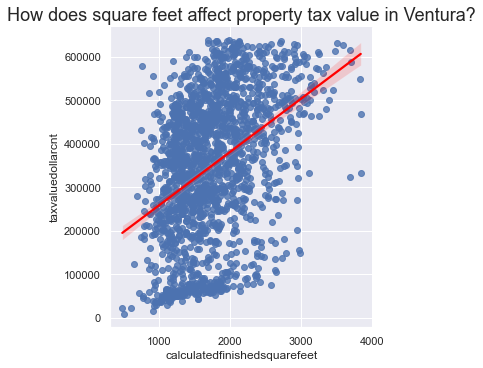

In [10]:
visuals.Ventura_SquareFeet()

Key takeaway: 
- As square feet increases, property value increases

### Orange County

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

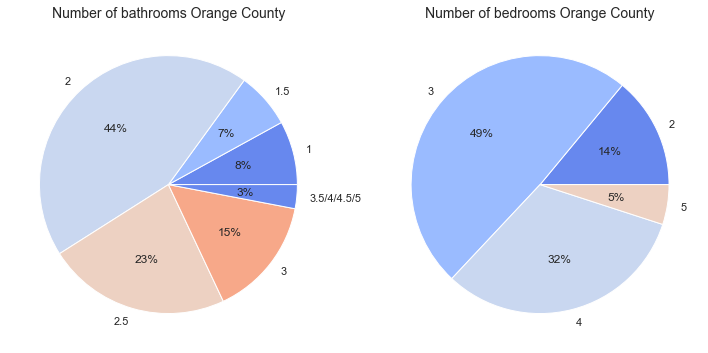

In [11]:
visuals.Orange_Pie()

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in Orange County in 2017: 44% had 2 bathrooms, 23% had 2.5 bathrooms, and 15% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 49% had 3 bedrooms, 32% had 4 bedrooms, and 14% had 2 bedrooms.

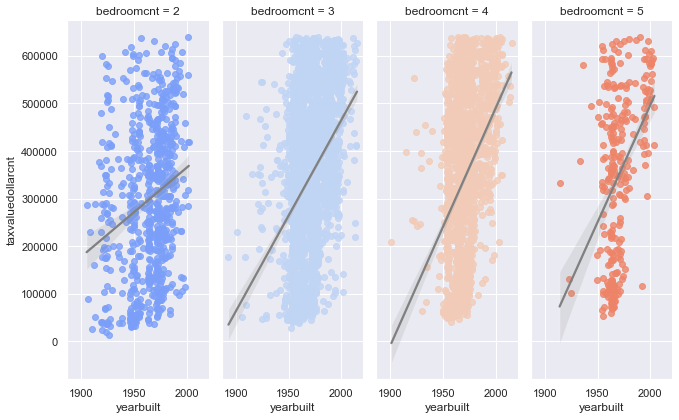

In [12]:
visuals.Orange_bedroom()

Key Takeaways: 
- As build year increases, home value increases irrespective of bedroom count 
- 86 % of Orange county homes (3/4/5 bedroom) have a strong positive linear relationship.
- 14% of Orange county homes (2 bedroom) have a slight positive linear relationship.

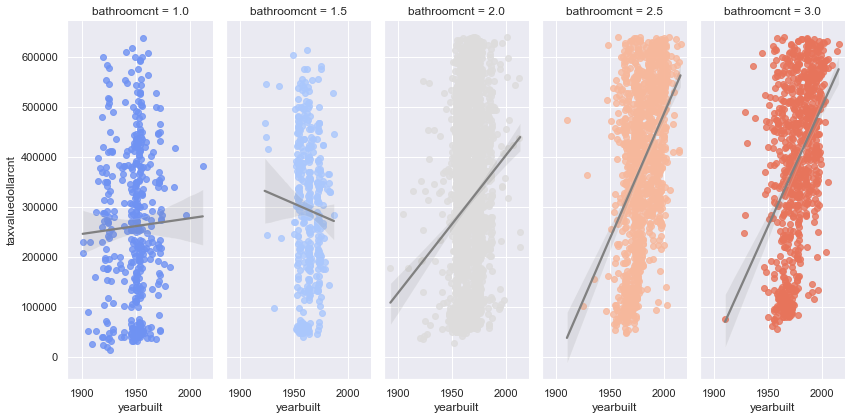

In [13]:
visuals.Orange_bathroom()

Key takeaways: 
- 82% of homes (2/2.5/3 bathrooms) have a moderate to strong positive linear relationship
- 7% of homes (1.5 bathrooms) have a moderate negative linear relationship 
- 8% of homes (1 bathroom) have a weak positive linear relationship

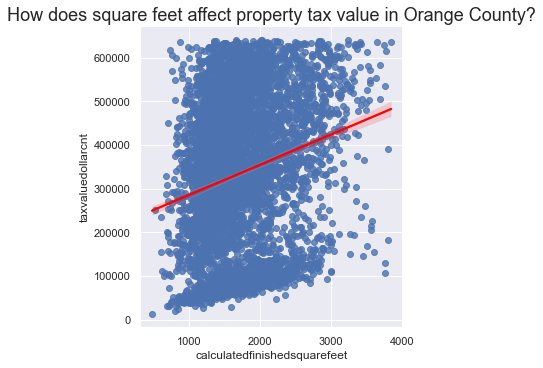

In [14]:
visuals.Orange_SquareFeet()

Key takeaway: 
- As square feet increases, property value increases

### LA County

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

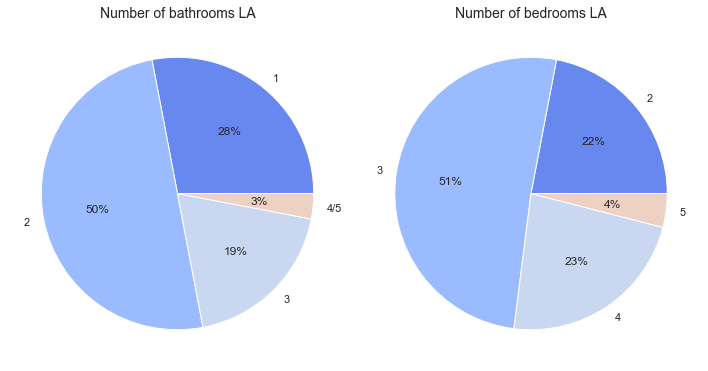

In [15]:
visuals.LA_Pie()

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in LA County in 2017: 50% had 2 bathrooms, 28% had 1 bathrooms, and 19% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 51% had 3 bedrooms, 23% had 4 bedrooms, and 22% had 2 bedrooms.

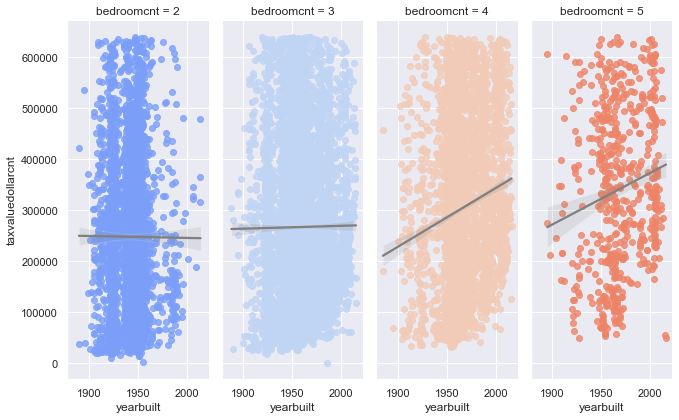

In [16]:
visuals.LA_bedroom()

Key Takeaways: 
- 27% of LA county homes (4/5 bedroom) have a moderate positive linear relationship between the year a home is built and its actual property tax value.
- 73% of LA county homes (2/3 bedroom) have no significant relationship between the year a home is built and its actual property tax value.

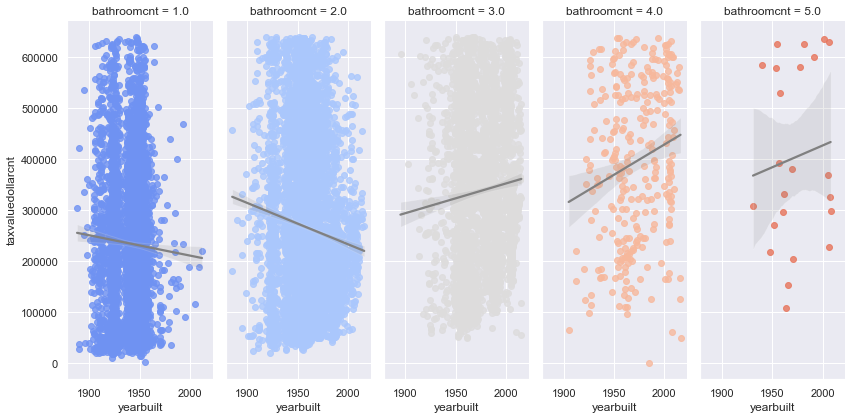

In [17]:
visuals.LA_bathroom()

Takeaway: 
- One bathroom and two bathroom homes have a weak to moderate negative linear relationship between year built and tax value. 
- Three, four, and five bathroom homes have a weak to moderate positive linear relationship between year built and tax value.

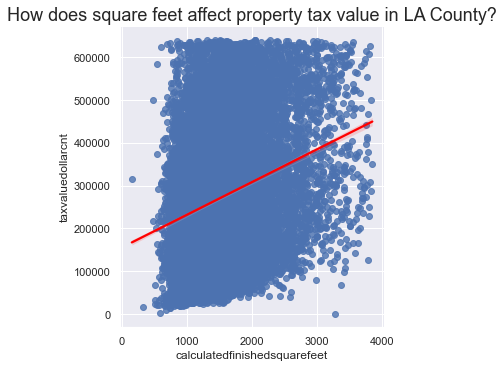

In [18]:
visuals.LA_SquareFeet()

Key takeaway: 
- As square feet increases, property value increases

### Exploratory Question Answers: 
- Why do some properties have a much higher value than others when they are located so close to each other?
- Factors that can increase house value inside the same county: more square feet, more bedrooms, more bathrooms, and newer homes. 
- Which has a greater influence on home value: number of bathrooms or number of bedrooms?
- Number of bathrooms has a greater influence on home value. In the homes that have 3, 4, and 5 bathrooms there is an upward trend in home values. 
- Do more bathrooms equate to a higher property value?
- Not necessarily. 
- Do more bedrooms equate to a higher property value? 
- Not necessarily 

### Exploratory Summary 
- Irrespective of county, home value increases as calculated square feet increases. 
- A county is a very wide demographic. It makes sense that there are many homes with only 2 bedrooms that have the same value as a home with four or five bedrooms. It is common knowledge that areas with lower crime rates and better schools have higher property values. If that type of information was available for this report, I would be able to create a much more predictive model. 
- When examining an entire county, more bedrooms and more bathrooms do not necessarily equate to higher property value. 
 

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Statistical Testing

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Ventura County 

- H0: There is no linear correlation between the number of bathrooms and property calculated square feet  in Ventura county. 
- HA: There is a linear relationship between the number of bathrooms and property calculated square feet in Ventura county. 

In [19]:
x = train_Ventura.bathroomcnt
y = train_Ventura.calculatedfinishedsquarefeet 
corr, p = stats.pearsonr(x, y)
corr, p

(0.743977301291493, 2.31103e-318)

### Takeaway Ventura County: 
- Correlation = 0.74 
- Multicollinearity: two features correlation score must be under 0.6. 
- Bathroom Count and Square feet cannot be used together in a linear regression model. 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Orange County

- H0: There is no linear correlation between the number of bathrooms and calculated square feet in Orange County. 
- HA: There is a linear relationship between the number of bathrooms and calculated square feet in Orange county. 

In [20]:
x = train_Orange.bathroomcnt 
y = train_Orange.calculatedfinishedsquarefeet
corr, p = stats.pearsonr(x, y)
corr, p

(0.7315480737312848, 0.0)

### Takeaway Orange County: 
- Correlation = 0.73 
- Multicollinearity: two features correlation score must be under 0.6. 
- Bathroom Count and Square feet cannot be used together in a linear regression model. 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

- H0: There is no linear correlation between the number of bathrooms and calculated square feet in LA County. 
- HA: There is a linear relationship between the number of bathrooms and calculated square feet in LA county. 

In [21]:
x = train_LA.bathroomcnt 
y = train_LA.calculatedfinishedsquarefeet
corr, p = stats.pearsonr(x, y)
corr, p

(0.772003263534347, 0.0)

### Takeaway LA County: 
- Correlation = 0.77 
- Multicollinearity: two features correlation score must be under 0.6. 
- Bathroom Count and Square feet cannot be used together in a linear regression model. 

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling

Features Chosen: 
- bedroom count 
- square feet
- year built 
- the reason bathroom count is not included is because it showed collinearity with square feet

### Questions from the team: 
- Would separating the data by county and applying different models improve accuracy?
- Would a new feature improve model accuracy? 
- Would a non-linear regression algorithm improve model accuracy?

### Question 1: Would separating the data by county and applying different models improve accuracy? 
- The answer to this question is yes. From the explore section we see that different counties have different relationships between the target variable and independent variables. By zeroing the data in on specific counties, the line chosen will only be concerned with county specific data points; i.e. not allowing data points from other counties to skew it.  

### Prepare Data For Modeling 

In [22]:
import pandas as pd
import wrangle
from sklearn.preprocessing import MinMaxScaler

In [23]:
#import data 
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [24]:
#split data 
train, validate, test = wrangle.split_zillow_data(df)

In [25]:
#scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [26]:
#split by county 
train_Ventura = train_scaled[train.location == 'Ventura']
train_LA = train_scaled[train.location == 'LA']
train_Orange = train_scaled[train.location == 'Orange']

In [27]:
#split by county 
validate_Ventura = validate_scaled[validate.location == 'Ventura']
validate_LA = validate_scaled[validate.location == 'LA']
validate_Orange = validate_scaled[validate.location == 'Orange']

In [28]:
#split by county 
test_Ventura = test_scaled[test.location == 'Ventura']
test_LA = test_scaled[test.location == 'LA']
test_Orange = test_scaled[test.location == 'Orange']

# Ventura County 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [29]:
#create train X and train y for modeling 
train_Ventura_X = train_Ventura[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
train_Ventura_y = train_Ventura[['taxvaluedollarcnt']]

In [30]:
#create validate X and validate y for modeling 
validate_Ventura_X = validate_Ventura[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
validate_Ventura_y = validate_Ventura[['taxvaluedollarcnt']]

In [31]:
#create test X and test y for modeling 
test_Ventura_X = test_Ventura[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
test_Ventura_y = test_Ventura[['taxvaluedollarcnt']]

### Ventura County Linear Model

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [32]:
#Create my X and y variables for quick reference 
X = train_Ventura_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
y = train_Ventura_y['taxvaluedollarcnt'].copy()

In [33]:
#Create A and B variables for quick reference 
A = validate_Ventura_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
B = validate_Ventura_y['taxvaluedollarcnt'].copy()

In [34]:
#Create a baseline 
baseline = train_Ventura_y.taxvaluedollarcnt.mean()
baseline

349795.85888212506

In [35]:
#Create dataframe with target variable and my baseline 
Ventura_df = pd.DataFrame(y)

In [36]:
#Create dataframe with validate target variable 
Ventura_validate_df = pd.DataFrame(B)

In [37]:
#add a column for baseline
Ventura_df['baseline'] = baseline

In [38]:
#add a column for baseline residual, and baseline residual squared
Ventura_df['baseline_residual'] = Ventura_df.taxvaluedollarcnt - Ventura_df.baseline
Ventura_df['baseline_residual^2'] = Ventura_df.baseline_residual**2

In [39]:
#Set the linear regression model 
lm = LinearRegression()

In [40]:
#fit the model 
lm.fit(train_Ventura_X, train_Ventura_y)

LinearRegression()

In [41]:
#print the coefficients 
lm.coef_[0]

array([328117.06821653, -15008.76336901,   2656.85633342])

In [42]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [43]:
#create predictions
predictions = lm.predict(train_Ventura_X)

In [44]:
#create a column for predictions 
Ventura_df['yhat'] = lm.predict(train_Ventura_X)

In [45]:
#create validate predictions 
predictions_validate = lm.predict(validate_Ventura_X)

In [46]:
Ventura_validate_df['yhat_validate'] = lm.predict(validate_Ventura_X)

In [47]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(train_Ventura_y, predictions)
mse = sklearn.metrics.mean_squared_error(train_Ventura_y, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_Ventura_y, predictions))
ev = sklearn.metrics.explained_variance_score(train_Ventura_y, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 119452.69679537787
Mean Squared Error: 20546455983.057674
Root Mean Squared Error: 143340.35015674293
Explained Variance: 0.22834942965145122


In [48]:
RMSE2 = sklearn.metrics.mean_squared_error(train_Ventura_y, Ventura_df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(train_Ventura_y, Ventura_df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 143340.35015674293
RMSE baseline 163176.69036067685


In [49]:
RMSE_train = sklearn.metrics.mean_squared_error(train_Ventura_y, Ventura_df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(validate_Ventura_y, Ventura_validate_df.yhat_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 143340.35015674293
RMSE out of Sample 143411.72681573246


### Ventura County Non Linear Model 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [50]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_squared = pf.fit_transform(train_Ventura_X)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(validate_Ventura_X)
X_test_degree2 = pf.transform(test_Ventura_X)

In [51]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [52]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_squared, train_Ventura_y)

LinearRegression(normalize=True)

In [53]:
lm2.predict(X_train_squared).shape

(1807, 1)

In [54]:
# predict train
train_Ventura_y['train_predict'] = lm2.predict(X_train_squared)
train_Ventura_y.head()

,taxvaluedollarcnt,train_predict
45878,82288,349203.952079
32478,477462,433763.152747
27558,350261,290163.486286
17210,406655,360789.444876
42166,286606,362487.813657


In [55]:
# evaluate: rmse
rmse_train = mean_squared_error(train_Ventura_y.taxvaluedollarcnt, 
                                train_Ventura_y.train_predict)**(1/2)
rmse_train

142577.1510588396

In [56]:
# predict validate
validate_Ventura_y['validate_predict'] = lm2.predict(X_validate_degree2)

In [57]:
# evaluate: rmse
rmse_validate = mean_squared_error(validate_Ventura_y.taxvaluedollarcnt, validate_Ventura_y.validate_predict)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  142577.1510588396 
Validation/Out-of-Sample:  142725.46895218195


### Ventura County Summary: 
- Linear Model Out of Sample Data: 143411
- Non Linear Model Out of Sample Data: 142725

# Orange County 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [58]:
train_Orange_X = train_Orange[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
train_Orange_y = train_Orange[['taxvaluedollarcnt']]

In [59]:
validate_Orange_X = validate_Orange[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
validate_Orange_y = validate_Orange[['taxvaluedollarcnt']]

In [60]:
test_Orange_X = test_Orange[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
test_Orange_y = test_Orange[['taxvaluedollarcnt']]

### Orange County Linear Model 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [61]:
#Create my X and y variables for quick reference 
X = train_Orange_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
y = train_Orange_y['taxvaluedollarcnt'].copy()

In [62]:
#Create A and B variables for quick reference 
A = validate_Orange_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
B = validate_Orange_y['taxvaluedollarcnt'].copy()

In [63]:
#Create a baseline 
baseline = train_Orange_y.taxvaluedollarcnt.mean()
baseline

335525.42802814225

In [64]:
#Create dataframe with target variable and my baseline 
Orange_df = pd.DataFrame(y)

In [65]:
#Create dataframe with validate target variable 
Orange_validate_df = pd.DataFrame(B)

In [66]:
#add a column for baseline
Orange_df['baseline'] = baseline

In [67]:
#add a column for baseline residual, and baseline residual squared
Orange_df['baseline_residual'] = Orange_df.taxvaluedollarcnt - Orange_df.baseline
Orange_df['baseline_residual^2'] = Orange_df.baseline_residual**2

In [68]:
#Set the linear regression model 
lm = LinearRegression()

In [69]:
#fit the model 
lm.fit(train_Orange_X, train_Orange_y)

LinearRegression()

In [70]:
#print the coefficients 
lm.coef_[0]

array([135291.90099135, -20446.75008725,   3397.5836884 ])

In [71]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [72]:
#create predictions
predictions = lm.predict(train_Orange_X)

In [73]:
#create a column for predictions 
Orange_df['yhat'] = lm.predict(train_Orange_X)

In [74]:
#create validate predictions 
predictions_validate = lm.predict(validate_Orange_X)

In [75]:
Orange_validate_df['yhat_validate'] = lm.predict(validate_Orange_X)

In [76]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(train_Orange_y, predictions)
mse = sklearn.metrics.mean_squared_error(train_Orange_y, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_Orange_y, predictions))
ev = sklearn.metrics.explained_variance_score(train_Orange_y, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 136197.82710197172
Mean Squared Error: 25678348261.935986
Root Mean Squared Error: 160244.65127403155
Explained Variance: 0.13125390178561291


In [77]:
RMSE2 = sklearn.metrics.mean_squared_error(train_Orange_y, Orange_df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(train_Orange_y, Orange_df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 160244.65127403155
RMSE baseline 171924.23826069426


In [78]:
RMSE_train = sklearn.metrics.mean_squared_error(train_Orange_y, Orange_df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(validate_Orange_y, Orange_validate_df.yhat_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 160244.65127403155
RMSE out of Sample 162857.6791342959


### Orange County Non Linear Model 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [79]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_squared = pf.fit_transform(train_Orange_X)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(validate_Orange_X)
X_test_degree2 = pf.transform(test_Orange_X)

In [80]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [81]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_squared, train_Orange_y)

LinearRegression(normalize=True)

In [82]:
#predict on x train
lm2.predict(X_train_squared).shape

(5259, 1)

In [83]:
# predict train
train_Orange_y['train_predict'] = lm2.predict(X_train_squared)
train_Orange_y.head()

,taxvaluedollarcnt,train_predict
442,585000,283804.042804
30616,255560,281945.177478
1830,89362,321219.487547
32127,474323,431071.674059
20691,98237,309648.906879


In [84]:
# evaluate: rmse
rmse_train = mean_squared_error(train_Orange_y.taxvaluedollarcnt, 
                                train_Orange_y.train_predict)**(1/2)
rmse_train

158245.87717050375

In [85]:
# predict validate
validate_Orange_y['validate_predict'] = lm2.predict(X_validate_degree2)

In [86]:
# evaluate: rmse
rmse_validate = mean_squared_error(validate_Orange_y.taxvaluedollarcnt, validate_Orange_y.validate_predict)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  158245.87717050375 
Validation/Out-of-Sample:  160896.70337104402


### Orange County Summary: 
- Linear Model Out of Sample Data: 162857
- Non Linear Model Out of Sample Data: 160896

# LA County

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [87]:
train_LA_X = train_LA[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
train_LA_y = train_LA[['taxvaluedollarcnt']]

In [88]:
validate_LA_X = validate_LA[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
validate_LA_y = validate_LA[['taxvaluedollarcnt']]

In [89]:
test_LA_X = test_LA[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']]
test_LA_y = test_LA[['taxvaluedollarcnt']]

### Linear Model LA

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [90]:
#Create my X and y variables for quick reference 
X = train_LA_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
y = train_LA_y['taxvaluedollarcnt'].copy()

In [91]:
#Create A and B variables for quick reference 
A = validate_LA_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
B = validate_LA_y['taxvaluedollarcnt'].copy()

In [92]:
#Create a baseline 
baseline = train_LA_y.taxvaluedollarcnt.mean()
baseline

275038.64404130995

In [93]:
#Create dataframe with target variable and my baseline 
LA_df = pd.DataFrame(y)

In [94]:
#Create dataframe with validate target variable 
LA_validate_df = pd.DataFrame(B)

In [95]:
#add a column for baseline
LA_df['baseline'] = baseline

In [96]:
#add a column for baseline residual, and baseline residual squared
LA_df['baseline_residual'] = LA_df.taxvaluedollarcnt - LA_df.baseline
LA_df['baseline_residual^2'] = LA_df.baseline_residual**2

In [97]:
#Set the linear regression model 
lm = LinearRegression()

In [98]:
#fit the model 
lm.fit(train_LA_X, train_LA_y)

LinearRegression()

In [99]:
#print the coefficients 
lm.coef_[0]

array([ 3.11397962e+05, -1.70481796e+04, -1.68699036e+02])

In [100]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [101]:
#create predictions
predictions = lm.predict(train_LA_X)

In [102]:
#create a column for predictions 
LA_df['yhat'] = lm.predict(train_LA_X)

In [103]:
#create validate predictions 
predictions_validate = lm.predict(validate_LA_X)

In [104]:
LA_validate_df['yhat_validate'] = lm.predict(validate_LA_X)

In [105]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(train_LA_y, predictions)
mse = sklearn.metrics.mean_squared_error(train_LA_y, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_LA_y, predictions))
ev = sklearn.metrics.explained_variance_score(train_LA_y, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 133874.84764484255
Mean Squared Error: 24531911626.342743
Root Mean Squared Error: 156626.66320375577
Explained Variance: 0.07218322543102929


In [106]:
RMSE2 = sklearn.metrics.mean_squared_error(train_LA_y, LA_df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(train_LA_y, LA_df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 156626.66320375577
RMSE baseline 162605.25832644897


In [107]:
RMSE_train = sklearn.metrics.mean_squared_error(train_LA_y, LA_df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(validate_LA_y, LA_validate_df.yhat_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 156626.66320375577
RMSE out of Sample 156333.081478346


### LA Non Linear Model 

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [108]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_squared = pf.fit_transform(train_LA_X)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(validate_LA_X)
X_test_degree2 = pf.transform(test_LA_X)

In [109]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [110]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_squared, train_LA_y)

LinearRegression(normalize=True)

In [111]:
#predict on x train
lm2.predict(X_train_squared).shape

(14718, 1)

In [112]:
# predict train
train_LA_y['train_predict'] = lm2.predict(X_train_squared)
train_LA_y.head()

,taxvaluedollarcnt,train_predict
45857,79348,268570.208826
11954,202526,222697.643593
28541,459000,274026.229533
41480,55450,263154.163643
985,448539,408079.601241


In [113]:
# evaluate: rmse
rmse_train = mean_squared_error(train_LA_y.taxvaluedollarcnt, 
                                train_LA_y.train_predict)**(1/2)

In [114]:
# predict validate
validate_LA_y['validate_predict'] = lm2.predict(X_validate_degree2)

In [115]:
#predict test 
test_LA_y['test_predict'] = lm2.predict(X_test_degree2)

In [116]:
# evaluate: rmse
rmse_validate = mean_squared_error(validate_LA_y.taxvaluedollarcnt, validate_LA_y.validate_predict)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  156006.50853892308 
Validation/Out-of-Sample:  155560.9613220772


In [117]:
rmse_test = mean_squared_error(test_LA_y.taxvaluedollarcnt, 
                                test_LA_y.test_predict)**(1/2)

### LA County Summary: 
- Linear Model Out of Sample Data: 156333
- Non Linear Model Out of Sample Data: 155560

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 2:   Would a new feature improve model accuracy? 
- One of the options suggested by the team, to improve accuracy, was to create a new feature from existing features. The initial features outlined to examine included: bedroom count, bathroom count, square feet, and year built. The new feature that made the most sense to create out of the existing features would be a combination of bedrooms and bathrooms. For examine distinguish line by line the combination of bedrooms and bathrooms for each home. I would hypothesize that 3 bedroom 2 bathroom homes have a greater property value than 3 bedroom 1 bathroom homes. I did not create this feature because I know, based on the current results, that it might create a slight increase in accuracy, it is not the level of improvement necessary to make this model ready for anything useful. The solution to creating a highly accurate model is in acquiring new features with more key data. Beyond bedroom count, bathroom count, year built, and square feet, the model also needs to be broken down by neighborhood- with associated school ratings and crime statistics. 


### Model Evaluation

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Which works better a linear model or a nonlinear model?

For each county, the non linear model's RMSE was slightly better than the linear RMSE score.

In [171]:
df = pd.DataFrame({'A': ['Ventura', 'Ventura', 'Orange', 'Orange', 'LA', 'LA'],
      'B': ['Linear', 'Non Linear', 'Linear', 'Non Linear', 'Linear', 'Non Linear'],
      'C': [143411, 142725, 162857, 160896, 156333, 155560]})
df

,A,B,C
0,Ventura,Linear,143411
1,Ventura,Non Linear,142725
2,Orange,Linear,162857
3,Orange,Non Linear,160896
4,LA,Linear,156333
5,LA,Non Linear,155560


### Key Findings

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Bathroom Count, Counts! 

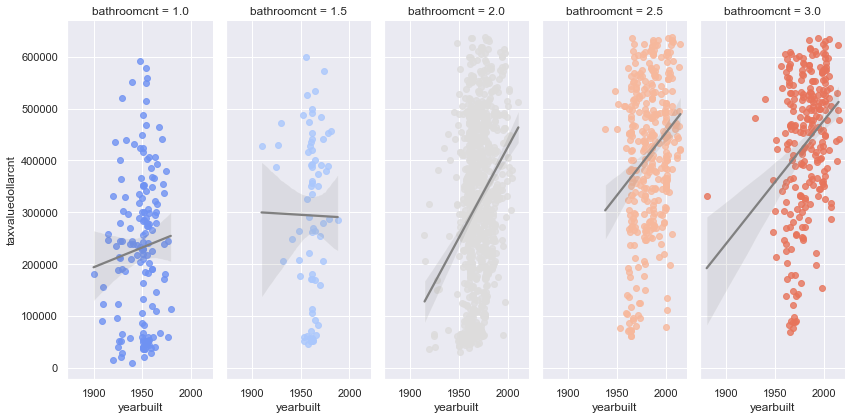

In [168]:
visuals.Ventura_bathroom()

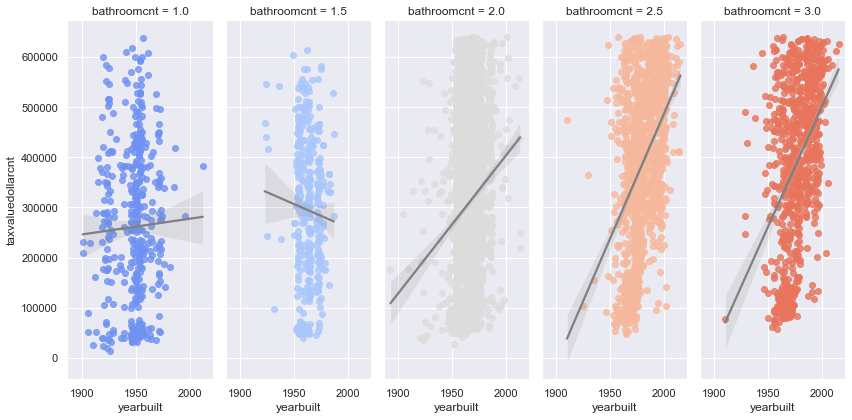

In [169]:
visuals.Orange_bathroom()

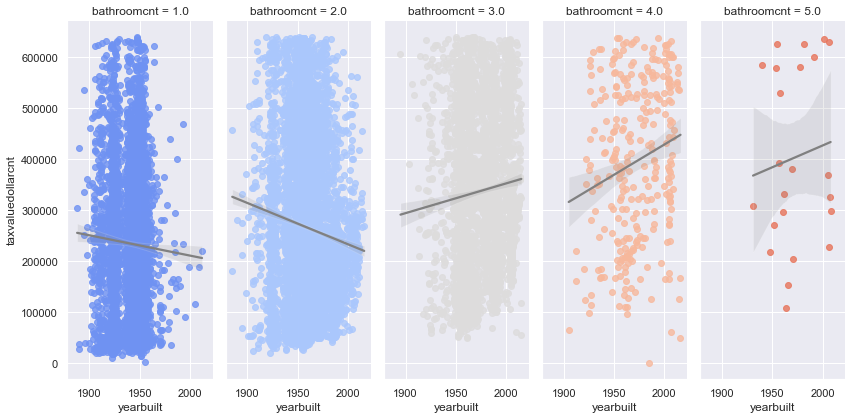

In [170]:
visuals.LA_bathroom()

###  Homes with fewer than 2 bathrooms in Ventura and Orange County have a noticeably different relationship with year built and property tax value when compared with homes that have 2 or more bathrooms.  Homes with fewer than 3 bathrooms in LA have a noticeably different relationship with year built and property tax value when compared with homes that have 3 or more bathrooms. 

### Recommendations

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

- I recommend subsetting the final data analysis by county and then again at fewer than two bathrooms for Orange and Ventura counties and at fewer than 3 bathrooms in LA. 

### Next Steps

<hr style="border-top: 5px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

- Use a different model to see if it could be a better predictor of home tax value. 